# Исследование дыннх рынка видеоигр

## Описание
Работа с данными для интернет-магазина «Стримчик», который занимается продажей компьютерных игр. Необходимо по данным из открытых источников выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. Работа проводится в декабре 2016 года с целью проведения рекламной компании на 2017 г.


## План исследования
* Подготовка данных
* Исследовательский анализ данных
* Подготовка портрета пользователя для разных регионов
* Проверка гипотез

## Данные
Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).

**Особенности:**
* Данные до 2016 года. Данные за 2016 год могут быть неполными.
* В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».



In [60]:
# Импорты
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import binom, norm
from matplotlib import pyplot as plt

In [61]:
# Настройки
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', '{:.2f}'.format)

## Загрузка данных

In [62]:
# Загрузка данных
try:
    # Практикум
    original_df = pd.read_csv('/datasets/games.csv')
    display('Датасеты из Практикума загружены.')
except:
    # Локальный проект
    original_df = pd.read_csv('datasets/games.csv')
    display('Локальные датасеты загружены.')

original_df.shape

'Локальные датасеты загружены.'

(16715, 11)

**Описание столбцов:**
* `Name` — название игры
* `Platform` — платформа
* `Year_of_Release` — год выпуска
* `Genre` — жанр игры
* `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
* `EU_sales` — продажи в Европе (миллионы проданных копий)
* `JP_sales` — продажи в Японии (миллионы проданных копий)
* `Other_sales` — продажи в других странах (миллионы проданных копий)
* `Critic_Score` — оценка критиков (максимум 100)
* `User_Score` — оценка пользователей (максимум 10)
* `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

In [63]:
original_df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.00,Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,1985.00,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.00,Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,2009.00,Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.00,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [64]:
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Необходимо провести подготовку данных:**
* Наименования столбцов лучше привести к стандарту
* Необходимо убедиться в отсутствии дублей (явных и неявных)
* Некорректно определились типы по некоторым столбцам
* Имеются столбцы со значительной долей пропусков

## Подготовка данных

In [65]:
# Создаем рабочий датафрейм
df = original_df.copy()
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.00,Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,1985.00,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.00,Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,2009.00,Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.00,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [66]:
# Переименовываем столбцы
df.columns = ['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [67]:
# Проверяем на наличие прямых дублей
df.duplicated().sum()

0

In [68]:
# Проверим на дубли связки имя+платформа.
df[df[['name', 'platform']].duplicated(keep=False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012.00,Sports,2.11,0.22,0.00,0.23,83.00,5.5,E
659,NaN,GEN,1993.00,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
1190,Need for Speed: Most Wanted,X360,2012.00,Racing,0.62,0.78,0.01,0.15,83.00,8.5,T
1591,Need for Speed: Most Wanted,X360,2005.00,Racing,1.00,0.13,0.02,0.10,83.00,8.5,T
1745,Sonic the Hedgehog,PS3,2006.00,Platform,0.41,0.06,0.04,0.66,43.00,4.1,E10+
4127,Sonic the Hedgehog,PS3,NaN,Platform,0.00,0.48,0.00,0.00,43.00,4.1,E10+
5972,Need for Speed: Most Wanted,PC,2005.00,Racing,0.02,0.23,0.00,0.04,82.00,8.5,T
11715,Need for Speed: Most Wanted,PC,2012.00,Racing,0.00,0.06,0.00,0.02,82.00,8.5,T
14244,NaN,GEN,1993.00,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012.00,Sports,0.00,0.01,0.00,0.00,83.00,5.5,E


In [69]:
# NFS MV 2012 года это перезапуск на новом движке. Не трогаем как на X360, так и на PC.
display(df[(df['name'] == 'Need for Speed: Most Wanted') & (df['platform'] == 'X360')])
df[(df['name'] == 'Need for Speed: Most Wanted') & (df['platform'] == 'PC')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1190,Need for Speed: Most Wanted,X360,2012.00,Racing,0.62,0.78,0.01,0.15,83.00,8.5,T
1591,Need for Speed: Most Wanted,X360,2005.00,Racing,1.00,0.13,0.02,0.10,83.00,8.5,T


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
5972,Need for Speed: Most Wanted,PC,2005.00,Racing,0.02,0.23,0.00,0.04,82.00,8.5,T
11715,Need for Speed: Most Wanted,PC,2012.00,Racing,0.00,0.06,0.00,0.02,82.00,8.5,T


In [70]:
# По Cонику по открытым данным итоговые продажи на PS3 в мире были около 1 млн копий. Удаляем вторую строку. https://vgsales.fandom.com/wiki/Sonic
display(df[(df['name'] == 'Sonic the Hedgehog') & (df['platform'] == 'PS3')])
display(df.shape)
df.drop(index=4127, inplace=True)
df.reset_index(drop=True, inplace=True)
display(df.shape)
display(df[(df['name'] == 'Sonic the Hedgehog') & (df['platform'] == 'PS3')])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1745,Sonic the Hedgehog,PS3,2006.00,Platform,0.41,0.06,0.04,0.66,43.00,4.1,E10+
4127,Sonic the Hedgehog,PS3,NaN,Platform,0.00,0.48,0.00,0.00,43.00,4.1,E10+


(16715, 11)

(16714, 11)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1745,Sonic the Hedgehog,PS3,2006.00,Platform,0.41,0.06,0.04,0.66,43.00,4.1,E10+


In [71]:
# По неизвестной игре две строчки с nan по имени и жанру на примерно 2.4 млн продаж из 31 млн продаж по платформе GEN. По платформе GEN нет похожих строк с аналогичными продажами или с аналогичным годом выхода. Это вряд ли дубли. Ничего с этим строками делать не будем. В контексте работы влияния на выводы этих строк не должно быть.
display(df[(df['name'].isna()) & (df['platform'] == 'GEN')])
display(df[(df['platform'] == 'GEN')][['eu_sales', 'na_sales', 'jp_sales', 'other_sales']].sum().sum())
df[(df['platform'] == 'GEN')].sort_values('jp_sales').head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.00,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14243,NaN,GEN,1993.00,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


30.769999999999996

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1453,Mortal Kombat 3,GEN,1994.00,Fighting,1.03,0.27,0.00,0.04,NaN,NaN,NaN
564,Mortal Kombat,GEN,1992.00,Fighting,1.95,0.63,0.00,0.09,NaN,NaN,NaN
1842,NBA Jam Tournament Edition,GEN,1994.00,Sports,0.95,0.14,0.00,0.03,NaN,NaN,NaN
659,NaN,GEN,1993.00,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
832,NBA Jam,GEN,1992.00,Sports,1.75,0.25,0.00,0.05,NaN,NaN,NaN
14243,NaN,GEN,1993.00,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN
1365,Disney's The Lion King,GEN,1994.00,Platform,0.97,0.37,0.03,0.05,NaN,NaN,NaN
14487,Puzzle & Action: Tant-R,GEN,1994.00,Misc,0.00,0.00,0.03,0.00,NaN,NaN,NaN
960,Sonic & Knuckles,GEN,1994.00,Platform,1.24,0.43,0.03,0.12,NaN,NaN,NaN
14131,Castlevania Bloodlines,GEN,1994.00,Platform,0.00,0.00,0.04,0.00,NaN,NaN,NaN


In [72]:
# Madden - удалим дубль. Незначительные продажи.
display(df[(df['name'] == 'Madden NFL 13') & (df['platform'] == 'PS3')])
display(df.shape)
df.drop(index=16229, inplace=True)
df.reset_index(drop=True, inplace=True)
display(df.shape)
display(df[(df['name'] == 'Madden NFL 13') & (df['platform'] == 'PS3')])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012.00,Sports,2.11,0.22,0.00,0.23,83.00,5.5,E
16229,Madden NFL 13,PS3,2012.00,Sports,0.00,0.01,0.00,0.00,83.00,5.5,E


(16714, 11)

(16713, 11)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012.00,Sports,2.11,0.22,0.00,0.23,83.00,5.5,E


In [73]:
# Посмотрим на имена
df['name'].value_counts(dropna=False).head(20)

Need for Speed: Most Wanted                12
FIFA 14                                     9
LEGO Marvel Super Heroes                    9
Ratatouille                                 9
Madden NFL 07                               9
Cars                                        8
Angry Birds Star Wars                       8
LEGO Harry Potter: Years 5-7                8
Lego Batman 3: Beyond Gotham                8
The LEGO Movie Videogame                    8
Monopoly                                    8
LEGO Star Wars II: The Original Trilogy     8
LEGO The Hobbit                             8
FIFA 15                                     8
Terraria                                    8
FIFA Soccer 13                              8
LEGO Jurassic World                         8
Madden NFL 08                               8
Tomb Raider: Legend                         7
Spider-Man 3                                7
Name: name, dtype: int64

In [74]:
# Как видим одна игра может выпускаться в разные годы на разных платформах. Так же игра может перезапускаться в качестве ремейка или ремастера даже в рамках одной платформы.
df[df['name'] == 'Need for Speed: Most Wanted']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
253,Need for Speed: Most Wanted,PS2,2005.00,Racing,2.03,1.79,0.08,0.47,82.00,9.1,T
523,Need for Speed: Most Wanted,PS3,2012.00,Racing,0.71,1.46,0.06,0.58,NaN,NaN,NaN
1190,Need for Speed: Most Wanted,X360,2012.00,Racing,0.62,0.78,0.01,0.15,83.00,8.5,T
1591,Need for Speed: Most Wanted,X360,2005.00,Racing,1.00,0.13,0.02,0.10,83.00,8.5,T
1998,Need for Speed: Most Wanted,XB,2005.00,Racing,0.53,0.46,0.00,0.05,83.00,8.8,T
2048,Need for Speed: Most Wanted,PSV,2012.00,Racing,0.33,0.45,0.01,0.22,NaN,NaN,NaN
3581,Need for Speed: Most Wanted,GC,2005.00,Racing,0.43,0.11,0.00,0.02,80.00,9.1,T
5971,Need for Speed: Most Wanted,PC,2005.00,Racing,0.02,0.23,0.00,0.04,82.00,8.5,T
6272,Need for Speed: Most Wanted,WiiU,2013.00,Racing,0.13,0.12,0.00,0.02,NaN,NaN,NaN
6409,Need for Speed: Most Wanted,DS,2005.00,Racing,0.24,0.01,0.00,0.02,45.00,6.1,E


In [75]:
# Данные по продажам выглядят разумно. Десятки миллионов проданных игр по одному тайтлу - вполне реальные цифры.
df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].describe().T

,count,mean,std,min,25%,50%,75%,max
na_sales,16713.00,0.26,0.81,0.00,0.00,0.08,0.24,41.36
eu_sales,16713.00,0.15,0.50,0.00,0.00,0.02,0.11,28.96
jp_sales,16713.00,0.08,0.31,0.00,0.00,0.00,0.04,10.22
other_sales,16713.00,0.05,0.19,0.00,0.00,0.01,0.03,10.57


In [76]:
# Преобразуем типы
display(df.isna().sum())
df['year_of_release'] = df['year_of_release'].astype('Int64')
df['critic_score'] = df['critic_score'].astype('Int64')

# Добавляем столбец tbd
display(f'Количество tbd: {df[df["user_score"] == "tbd"].shape[0]}')
df['tbd'] = df.apply(lambda x: True if x['user_score'] ==
                     'tbd' else False, axis='columns')
display(f'Количество итоговых пропусков в user_score: {df["tbd"].sum() + df["user_score"].isna().sum()}')

# Меняем tbd на nan в user_score
df['user_score'] = df['user_score'].apply(lambda x: x if x != 'tbd' else float('nan'))

# Преобразуем тип
df['user_score'] = df['user_score'].astype(float)
display(df.isna().sum())

name                  2
platform              0
year_of_release     268
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

'Количество tbd: 2424'

'Количество итоговых пропусков в user_score: 9125'

name                  2
platform              0
year_of_release     268
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
tbd                   0
dtype: int64

Для преобразования user_score столбца необходимо заменить tbd на nan, т.к. to be determined - это отсутствие оценки. Чтобы не потерять данные, добавим столбец tbd, где отметим True/False для замен.

In [77]:
# Проверка
display(df.head())
df.info()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,tbd
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.00,E,False
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,NaN,False
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.30,E,False
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.00,E,False
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,NaN,False


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16711 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16445 non-null  Int64  
 3   genre            16711 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8135 non-null   Int64  
 9   user_score       7588 non-null   float64
 10  rating           9947 non-null   object 
 11  tbd              16713 non-null  bool   
dtypes: Int64(2), bool(1), float64(5), object(4)
memory usage: 1.5+ MB


In [78]:
# Считаем суммарные продажи
df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].round(6) # Округлим до 6 знака, чтобы убрать некрасивые хвосты. Это величина в млн штук, так что это будет корректно.
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

**Комментарии по типам:**
* Типы приведены в порядок.
* Добавлены новые столбцы total_sales и tbd.

In [79]:
# Пропуски
df.isna().sum().sort_values(ascending=False)

user_score         9125
critic_score       8578
rating             6766
year_of_release     268
name                  2
genre                 2
platform              0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
tbd                   0
total_sales           0
dtype: int64

In [80]:
# Последние 2 пропуска за счёт 2 игр на платформе GEN
df[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,tbd,total_sales
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,<NA>,NaN,NaN,False,2.39
14243,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,<NA>,NaN,NaN,False,0.03


In [81]:
# Платформы с пропущенным годом релиза
df[df['year_of_release'].isna()]['platform'].value_counts()

Wii     34
PS2     34
DS      30
X360    30
PS3     24
XB      21
2600    17
PC      17
PSP     16
GC      14
GBA     11
3DS      8
PS       7
N64      3
GB       1
PSV      1
Name: platform, dtype: int64

In [82]:
# Диапазон в 36 лет. Есть очень старые данные.
df['year_of_release'].min(), df['year_of_release'].max()

(1980, 2016)

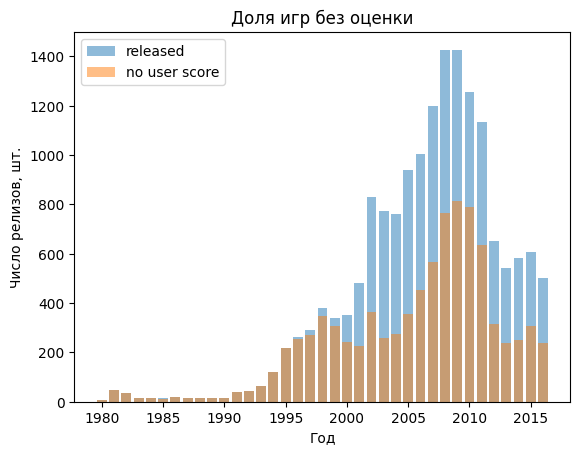

In [83]:
# Количество пропусков в данных по user_score и количество релизов в году
games_released = df['year_of_release'].value_counts().sort_index()
games_with_no_user_score = df[df['user_score'].isna()]['year_of_release'].value_counts().sort_index()

fig, ax = plt.subplots()
ax.set_title('Доля игр без оценки')
ax.set_xlabel('Год')
ax.set_ylabel('Число релизов, шт.')
plt.bar(games_released.index , games_released, label='released', alpha = 0.5)
plt.bar(games_with_no_user_score.index , games_with_no_user_score, label='no user score', alpha = 0.5)
ax.legend()
plt.show()

In [84]:
# Пропуски в оценке пользователей и критиков
df[df['user_score'].isna() & df['critic_score'].isna()].shape[0]

8005

In [85]:
# Пропуски в оценке и в рейтинге
df[df['user_score'].isna() & df['critic_score'].isna() & df['rating'].isna()].shape[0]

6667

**Комментарий по пропускам и дублям:**
* Удалены две строки с неявными дублями.
* Пропуски по первым трём столбцам (рейтинг и оценки) никак не заменить. Эти параметры невозможно предсказать на основе других столбцов даже примерно. Удалить - потеряем слишком большую долю данных. Даже несмотря на то, что пропущенные строки по рейтингам пересекаются с пропущенными строками по оценкам.
* Наличие таких пропусков связано с несовершенством механизма формирования таких данных. Как видно из графика выше, до 1995 года практически не существовало агрегаторов оценок для игр и данные полностью отсутствуют. Но даже когда такие агрегаторы появились - далеко не все игры на них попадали, и даже те игры, которые попадали на агрегаторы не всегда были достаточно интересны публике для формирования итоговой оценки.
* Большое количество пропусков по возрастному рейтингу - тоже объяснимо. Это рейтинг всего лишь одной ассоциации. Далеко не все игры подают заявки для такой оценки, далеко не всем играм нужна такая оценка.
* Пропуски по году релиза можно очень приблизительно предсказать по названию платформы (взять средний год жизни конкретной платформы), но это очень приблизительная оценка и делать этого мы не будем. Просто оставим как есть. Наличие таких пропусков вероятнее всего связано с не очень высоким качеством сбора информации в тех местах, откуда она была выгружена. Скорее всего это ручные ошибки сбора информации и они происходили как с играми на очень старых платформах (N64), так и с играми на платформах прошлого поколения (XB).
* 2 пропуска с именем игры - тоже оставим на случай, если нам понадобится получить важные цифры по платформе GEN. Скорее всего это просто человеческая ошибка.
* **Итого:** С пропусками решено **не делать пока ничего**. Просто оставить.

## EDA

### Выпуск игр по годам

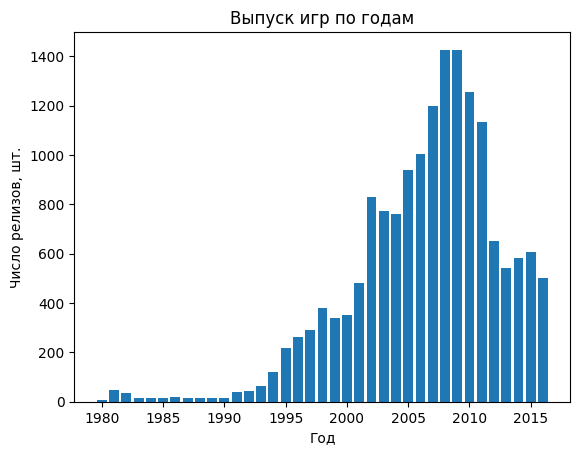

count     37.00
mean     444.46
std      451.54
min        9.00
25%       36.00
50%      338.00
75%      762.00
max     1427.00
Name: year_of_release, dtype: float64

16445

In [86]:
# График выпуска игр по годам
fig, ax = plt.subplots()
ax.set_title('Выпуск игр по годам')
ax.set_xlabel('Год')
ax.set_ylabel('Число релизов, шт.')
plt.bar(games_released.index , games_released)
plt.show()
display(games_released.describe().T)

# Сколько суммарно выпущено игр.
games_released.sum()

In [87]:
# Количество игр, выпущенных до 1990 года включительно.
df.query('year_of_release <= 1990').shape[0]

221

**Вывод:**
* За период с 1980 по 2016 год (не полный) было выпущено более 16 тыс. игр.
* Пик пришелся на 2008-9 гг. В эти годы выпускалось более 1,4 тыс. игр. В 2012 году произошел резкий спад.
* За период до 1990 года включительно была выпущена всего 221 игра. Игровая индустрия в тот период только начинала формироваться. Тем не менее, данные и за этот период могут представлять интерес.
* При этом наиболее отражает текущее состояние игровой индустрии период начиная с 2012 года включительно.

### Продажи игр

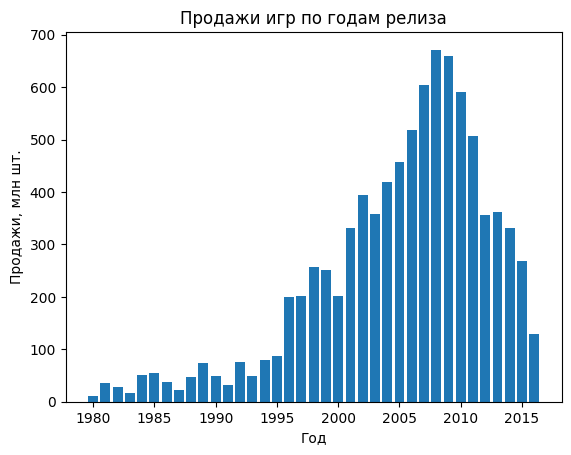

In [88]:
# График суммарной продажи игр по годам релиза.
fig, ax = plt.subplots()
ax.set_title('Продажи игр по годам релиза')
ax.set_xlabel('Год')
ax.set_ylabel('Продажи, млн шт.')
plt.bar(df.groupby('year_of_release')['total_sales'].sum().index , df.groupby('year_of_release')['total_sales'].sum())
plt.show()

platform
PS2    1255.77
X360    971.42
PS3     939.16
Wii     907.51
DS      806.12
Name: total_sales, dtype: float64

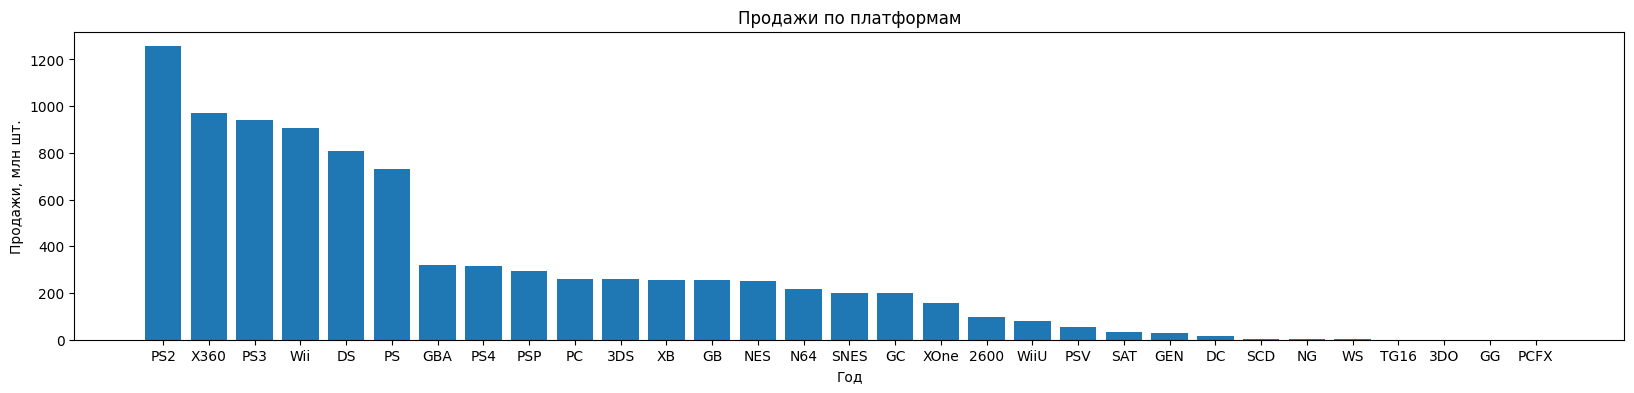

In [89]:
# Топ5 платформ по продажам.
display(df.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head())

fig, ax = plt.subplots(figsize=(20,4))
ax.set_title(f'Продажи по платформам')
ax.set_xlabel('Год')
ax.set_ylabel('Продажи, млн шт.')
plt.bar(df.groupby('platform')['total_sales'].sum().sort_values(ascending=False).index , df.groupby('platform')['total_sales'].sum().sort_values(ascending=False))
plt.show()

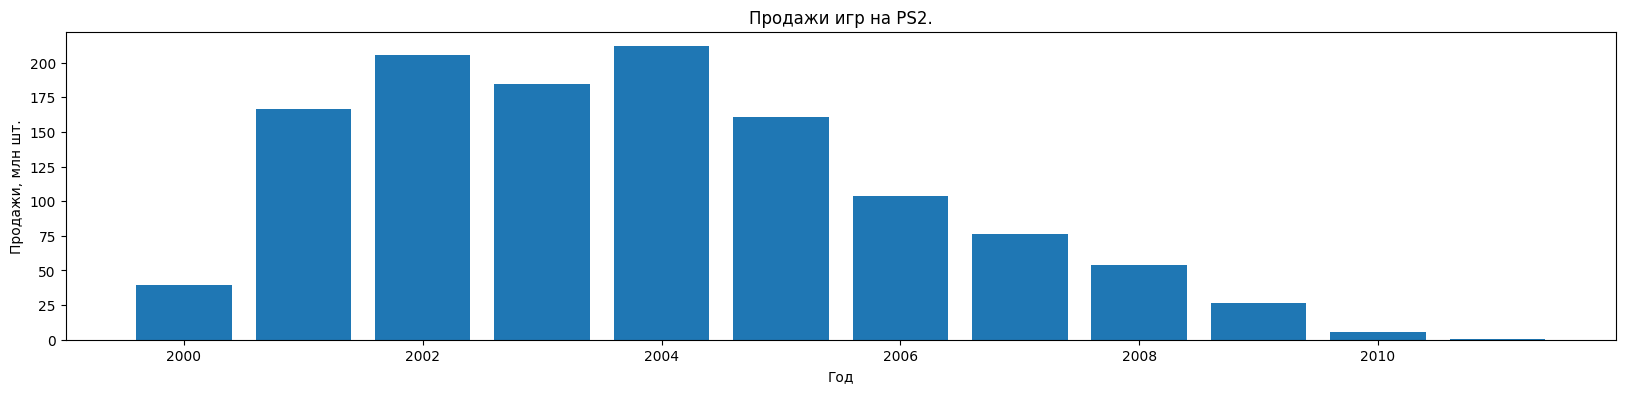

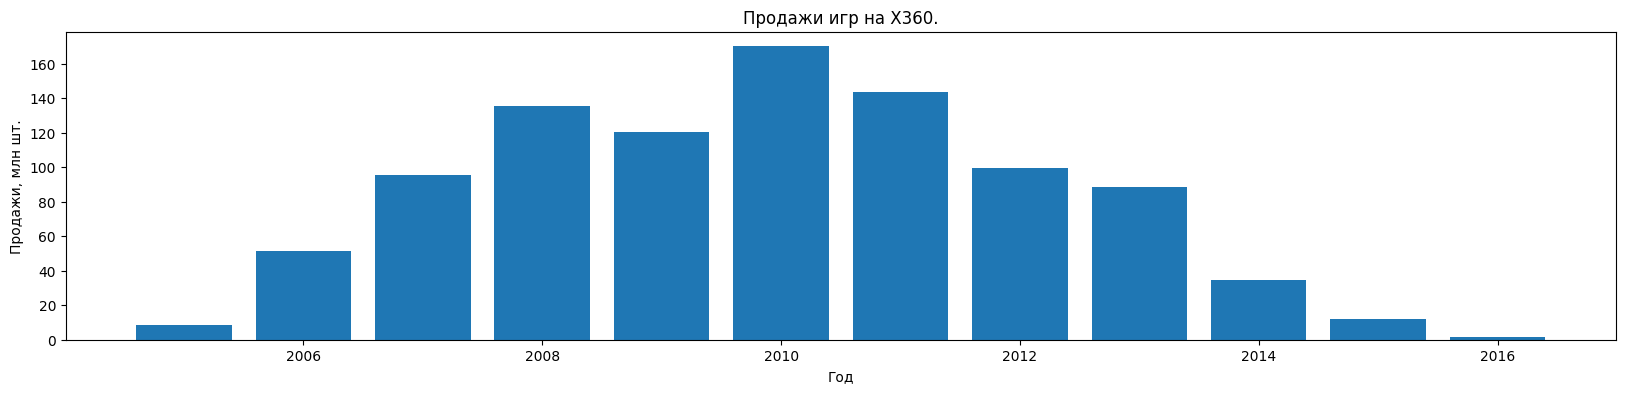

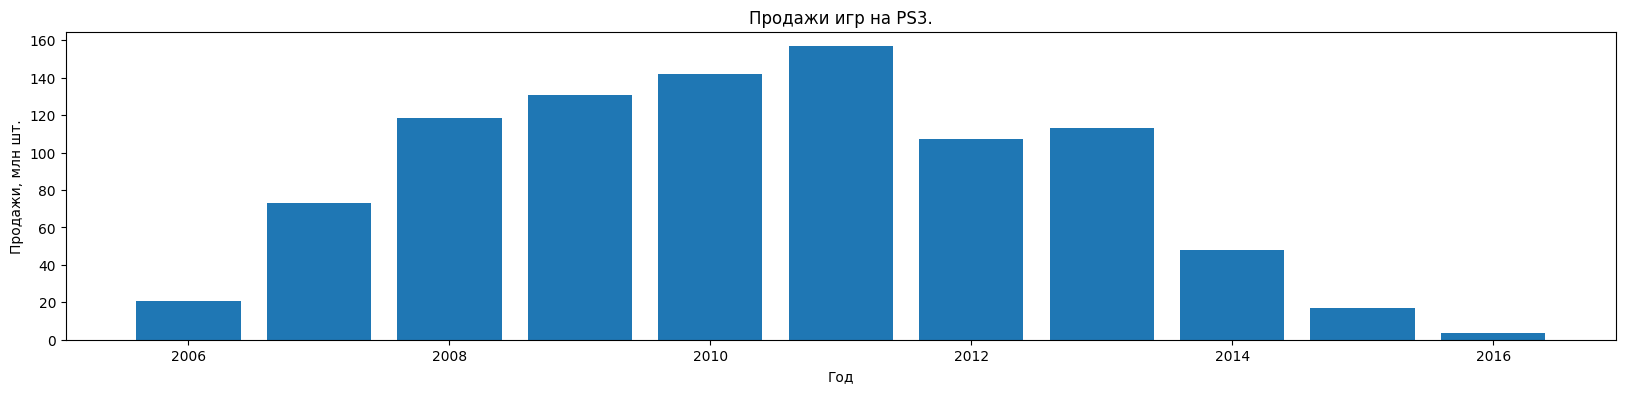

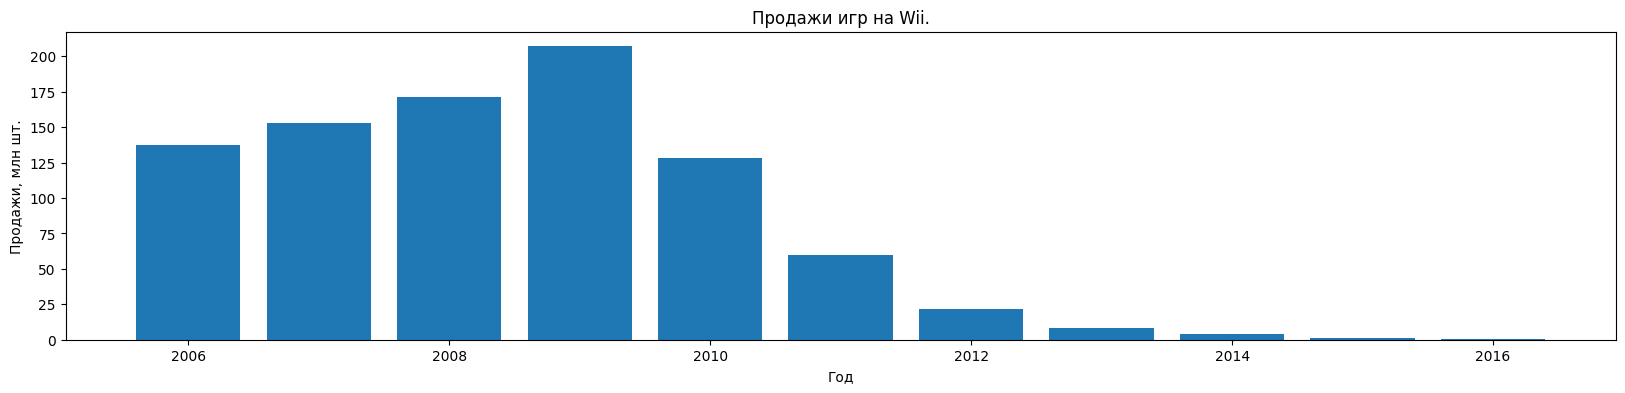

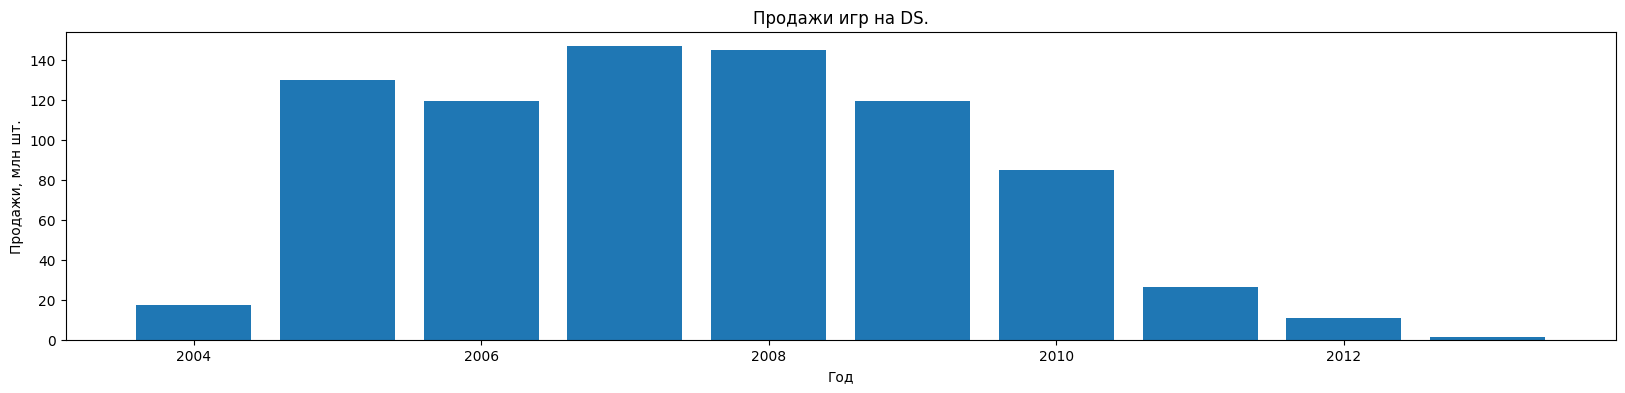

In [90]:
# Продажи игр на основных платформах.
top_5_platform = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head().index
for platform in top_5_platform:
    data_for_graph = df.query(f'platform == "{platform}"').groupby('year_of_release')['total_sales'].sum()
    # Поправка на ошибочный тайтл в DS.
    if platform == 'DS':
        data_for_graph = df[df['year_of_release'] >= 2004].query(f'platform == "{platform}"').groupby('year_of_release')['total_sales'].sum()

    # Строим график
    fig, ax = plt.subplots(figsize=(20,4))
    ax.set_title(f'Продажи игр на {platform}.')
    ax.set_xlabel('Год')
    ax.set_ylabel('Продажи, млн шт.')
    plt.bar(data_for_graph.index , data_for_graph)
    plt.show()

In [91]:
# Тут явно ошибка, DS вышла после 2004 года. Сделаем поправку на этот тайтл при построении графиков.
df.query('platform == "DS"').sort_values('year_of_release').head(1)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,tbd,total_sales
15956,Strongest Tokyo University Shogi DS,DS,1985,Action,0.00,0.00,0.02,0.00,<NA>,NaN,NaN,False,0.02


**Вывод:**
* График количества проданных игр по годам релиза примерно повторяет график выпуска новых игр, за исключением того, что хвост у этого графика срезан в конце т.к. это график не продаж в год, а график продаж игр выпущенных в конкретном году. Таким образом, игры, выпущенные ближе к концу рассматриваемого периода еще доберут в продажах в течение нескольких лет позже.
* **В целом данные по продажам вызывают опасения. Исходя из новостного фона сложно поверить в их правдивость. Консоли из поколения в поколение продаются всё большими тиражами, их доступность растёт, база игроков тоже. Игровая индустрия выбилась из чего-то нишевого и стремительно захватывает мир. А продажи после 2009 года в штуках падают. Это очень странно и сложно объяснить только финансовым кризисом. Стоит обязательно проконсультироваться с предоставившими данные, должно быть какое-то объяснение такому феномену.**
* В топ 5 платформ по количеству проданных игр выпущенных в рассматриваемый период входят (с указанием года появления платформы): PS2 - 2000 год, X360 - 2006 год, PS3 - 2006 год, Wii - 2006 год, DS - 2004 год.
* Как видно из графиков характерный срок жизни платформы составляет примерно 8-9 лет.
* Долгожителями являются платформы PS2 и X360. Некоторые игры для них выпускались даже через 12 лет после появления платформы. В расчёт, конечно, не берется PC, где время жизни платформы неограничено.

### Актуальные платформы-лидеры

In [92]:
# Возьмем данные за последние 4 с небольшим года. Будем считать это актуальным периодом.
year_of_actuality = 2012
actual_df = df.copy().query('year_of_release >= @year_of_actuality')
display(actual_df.shape)
actual_df.head()

(2885, 13)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,tbd,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.20,M,False,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.10,M,False,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,<NA>,NaN,NaN,False,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,<NA>,NaN,NaN,False,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83,5.30,M,False,13.79


Данные берем за актуальный - период с 2012 года включительно. Это год после перелома тенденции к росту и период, когда показатели как по продажам, так и по релизам относительно стабилизируются.

In [93]:
# Построим пивот по годам в разрезе платформ
current_pivot = actual_df[~actual_df['year_of_release'].isna()].pivot_table(index='year_of_release', columns='platform', aggfunc='sum', values='total_sales')
current_pivot

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2012,51.36,11.01,23.22,107.35,NaN,7.69,16.19,21.71,17.56,99.74,NaN
2013,56.57,1.54,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014,43.76,NaN,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,NaN,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,NaN,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


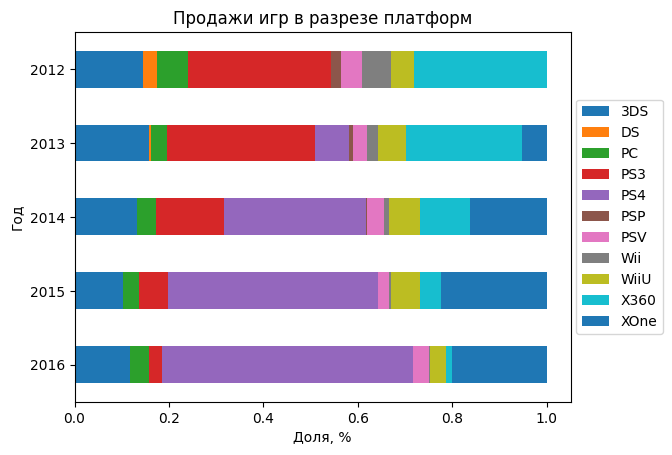

In [94]:
# Рисуем график с долями платформ по годам
ax = current_pivot.divide(current_pivot.sum(axis='columns'), axis='index').sort_index(ascending=False).plot(kind='barh', stacked=True)
ax.set_title('Продажи игр в разрезе платформ')
ax.set_xlabel('Доля, %')
ax.set_ylabel('Год')
ax.legend(bbox_to_anchor=(1.2, 0.5), loc='right')
plt.show()

* Как видно из графика рынок игр динамично меняется. К 2016 году даже на неполных данных видно, что лидерство среди платформ занимают PS4, XOne и 3DS.
* Бывшие в 2012 году в лидерах платформы PS3 и X360 сменили поколение, при этом долгоиграющая 3DS не показывает на выбранном периоде явной нисходящей тенденции.
* Так же на графике мы можем увидеть смерть платформ DS, PSP и Wii.
* Остальные платформы так или иначе присутствуют на данном отрезке в небольших долях.

In [95]:
# Посмотрим на продажи по топ3 платформам
top3_platforms = ['PS4', 'XOne', '3DS']
for platform in top3_platforms:
    display(f'Топ 5 игр по продажам на платформе {platform}:')
    display(actual_df[actual_df['platform'] == platform][['name', 'total_sales']].sort_values('total_sales', ascending=False).head())

'Топ 5 игр по продажам на платформе PS4:'

,name,total_sales
31,Call of Duty: Black Ops 3,14.63
42,Grand Theft Auto V,12.62
77,FIFA 16,8.58
87,Star Wars Battlefront (2015),7.98
92,Call of Duty: Advanced Warfare,7.66


'Топ 5 игр по продажам на платформе XOne:'

,name,total_sales
99,Call of Duty: Black Ops 3,7.39
165,Grand Theft Auto V,5.47
179,Call of Duty: Advanced Warfare,5.26
242,Halo 5: Guardians,4.49
270,Fallout 4,4.22


'Топ 5 игр по продажам на платформе 3DS:'

,name,total_sales
33,Pokemon X/Pokemon Y,14.60
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,11.68
62,New Super Mario Bros. 2,9.90
73,Animal Crossing: New Leaf,9.17
96,Super Smash Bros. for Wii U and 3DS,7.55


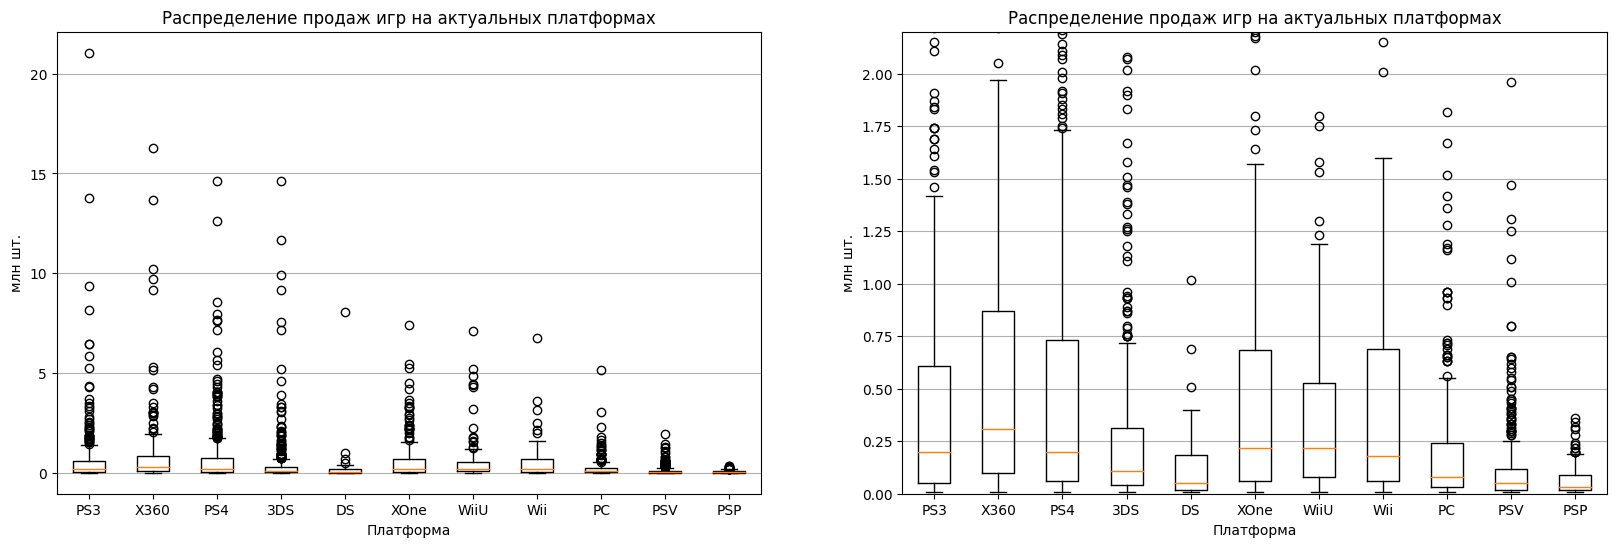

In [96]:
# Построим боксплоты по всем актуальным платформам.
# Формируем данные для графика.
total_sales_by_platform = actual_df.groupby('platform')['total_sales'].max().sort_values(ascending=False)
platforms = total_sales_by_platform.index
data_for_graph = []
for platform in platforms:
    data_for_graph.append(actual_df.query('platform == @platform')['total_sales'])

#Рисуем график.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))
ax1.set_title('Распределение продаж игр на актуальных платформах')
ax1.set_ylabel('млн шт.')
ax1.set_xlabel('Платформа')
ax1.yaxis.grid(True)
ax1.boxplot(data_for_graph, labels=platforms)
ax2.set_title('Распределение продаж игр на актуальных платформах')
ax2.set_ylabel('млн шт.')
ax2.set_xlabel('Платформа')
ax2.set_ylim(0, 2.2)
ax2.yaxis.grid(True)
ax2.boxplot(data_for_graph, labels=platforms);

In [97]:
# Посмотрим на самые продаваемые игры первых 4 платформ с самыми продаваемыми играми.
for i, platform in enumerate(platforms):
    if i >=4:
        break
    display(platform)
    platform_df = actual_df[actual_df['platform'] == platform]
    display(platform_df[platform_df['total_sales'] == platform_df['total_sales'].max()])

'PS3'

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,tbd,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.20,M,False,21.05


'X360'

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,tbd,total_sales
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.10,M,False,16.27


'PS4'

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,tbd,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,<NA>,NaN,NaN,False,14.63


'3DS'

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,tbd,total_sales
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,<NA>,NaN,NaN,False,14.60


* Из анализа боксплотов по продажам игр на актуальных платформ мы видим, что данные по продажам и популярность игр в целом распределены очень неравномерно. Есть абсолютное большинство игр, показывающих довольно посредственные результаты, и есть ряд "шедевров", которые на хайпе покупают все, у кого есть консоль определенной платформы.
* Среди таких счастливчиков стоит выделить суперхит GTA5, игры серии CoD. Мир 3DS ожидаемо не пересекается с консолями, рассчитанными на западный рынок. Здесь в топе продаж игры по Pokemon.

### Отзывы пользователей и критиков
Изучим влияние на продажи игр оценок пользователей и критиков. Оганичимся наиболее популярной платформой на 2016 год - PS4.

In [98]:
# Построим матрицу корреляций для продаж и оценок самой популярной актуальной платформы PS4. Nan можно игнорировать, т.к. при расчёте корреляции строки, в которых есть nan - игнорируются.
actual_df[actual_df['platform'] == 'PS4'][['total_sales', 'critic_score', 'user_score']].corr()

,total_sales,critic_score,user_score
total_sales,1.00,0.41,-0.03
critic_score,0.41,1.00,0.56
user_score,-0.03,0.56,1.00


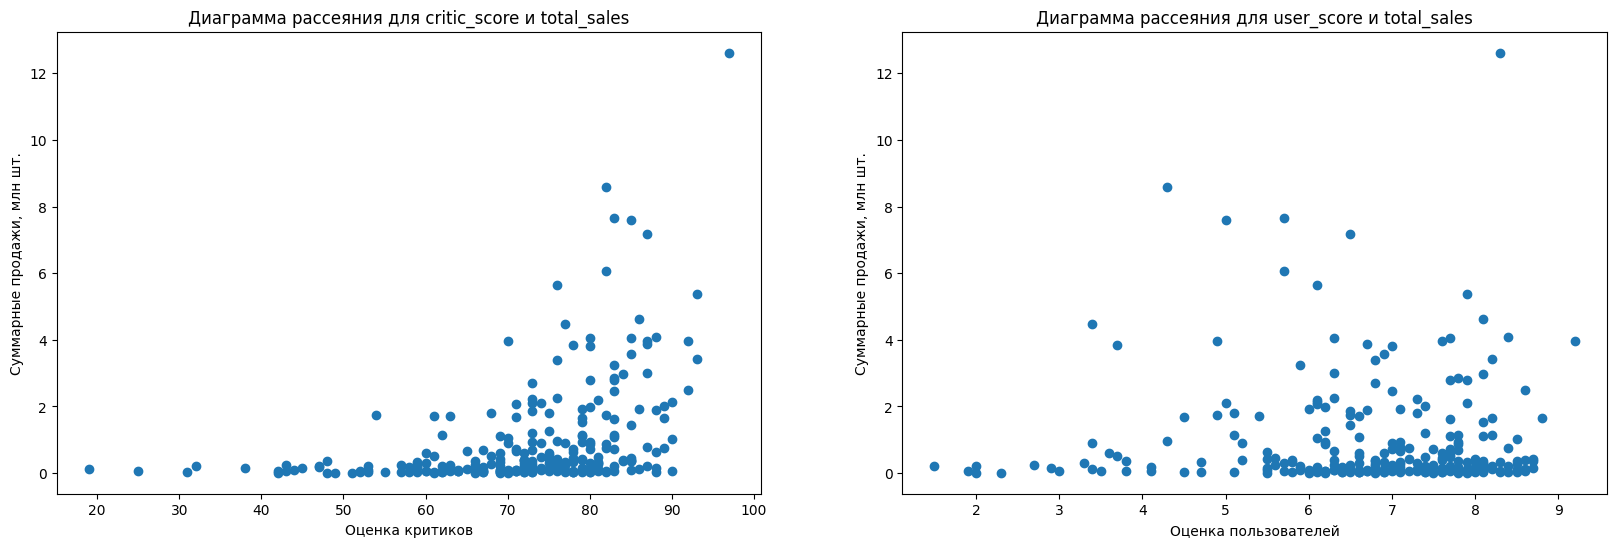

In [99]:
# Построим диаграммы рассеяния
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

ax1.set_title('Диаграмма рассеяния для critic_score и total_sales')
ax1.set_xlabel('Оценка критиков')
ax1.set_ylabel('Суммарные продажи, млн шт.')
ax1.scatter(x=actual_df[actual_df['platform'] == 'PS4'][['critic_score', 'total_sales']].dropna()['critic_score'], y=actual_df[actual_df['platform'] == 'PS4'][['critic_score', 'total_sales']].dropna()['total_sales'])

ax2.set_title('Диаграмма рассеяния для user_score и total_sales')
ax2.set_xlabel('Оценка пользователей')
ax2.set_ylabel('Суммарные продажи, млн шт.')
ax2.scatter(x=actual_df[actual_df['platform'] == 'PS4'][['user_score', 'total_sales']].dropna()['user_score'], y=actual_df[actual_df['platform'] == 'PS4'][['user_score', 'total_sales']].dropna()['total_sales']);

* Анализ показывает наличие невысокой корреляции продаж с оценками критиков. Это так же можно увидеть и на диаграмме рассеяния - чем больше оценка критиков, тем чаще встречаются игры с большим количеством продаж.
* Корреляции продаж с пользовательской оценкой практически нет. Это так же заметно на диаграмме рассеяния - несмотря на то, что среди тайтлов с очень низкой пользовательской оценкой почти нет бестселлеров, их можно часто встретить и среди игр с оценкой от низкой до средней. Хорошая пользовательская оценка - не гарантия высоких продаж.


'Платформа PS4.'

,total_sales,critic_score,user_score
total_sales,1.00,0.41,-0.03
critic_score,0.41,1.00,0.56
user_score,-0.03,0.56,1.00


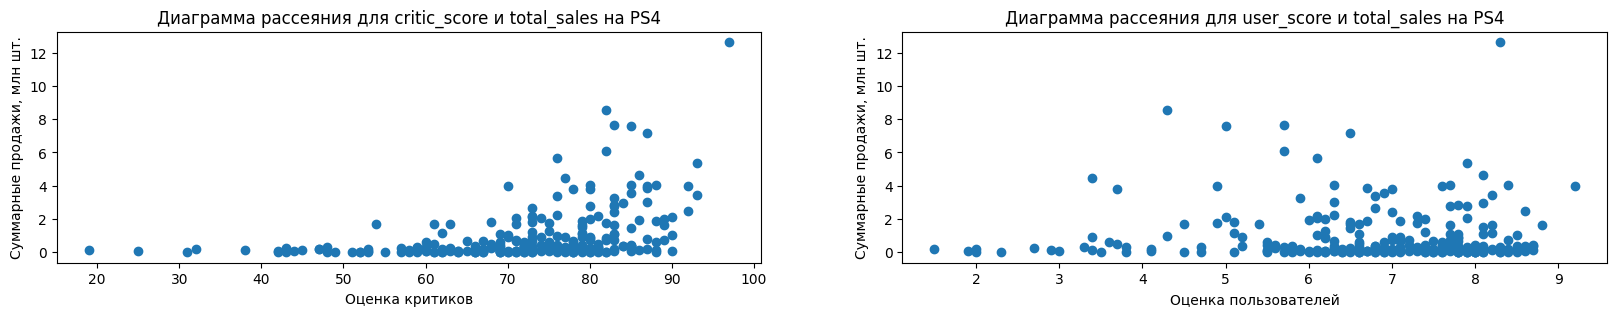

'Платформа XOne.'

,total_sales,critic_score,user_score
total_sales,1.00,0.42,-0.07
critic_score,0.42,1.00,0.47
user_score,-0.07,0.47,1.00


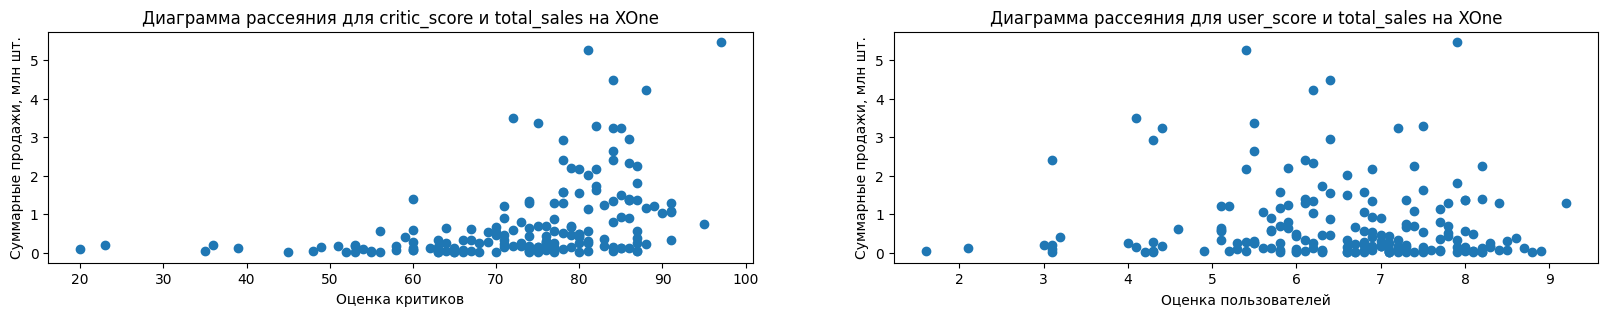

'Платформа 3DS.'

,total_sales,critic_score,user_score
total_sales,1.00,0.32,0.20
critic_score,0.32,1.00,0.72
user_score,0.20,0.72,1.00


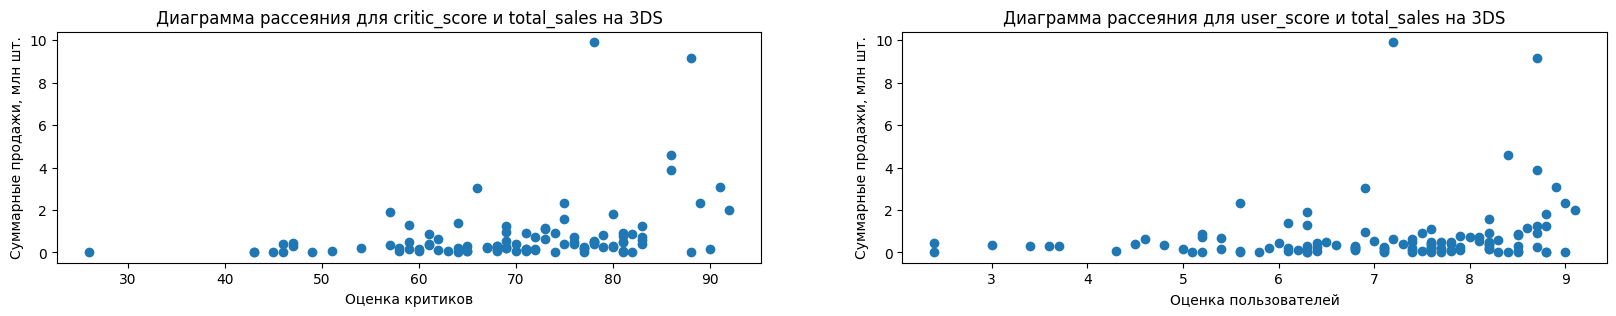

'Платформа PC.'

,total_sales,critic_score,user_score
total_sales,1.00,0.24,-0.12
critic_score,0.24,1.00,0.43
user_score,-0.12,0.43,1.00


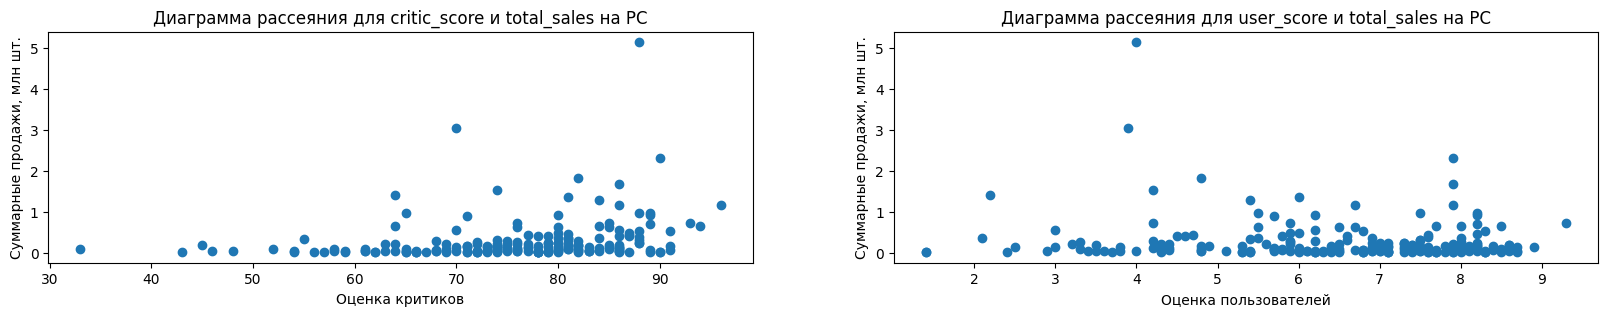

'Платформа PSV.'

,total_sales,critic_score,user_score
total_sales,1.00,0.09,-0.00
critic_score,0.09,1.00,0.70
user_score,-0.00,0.70,1.00


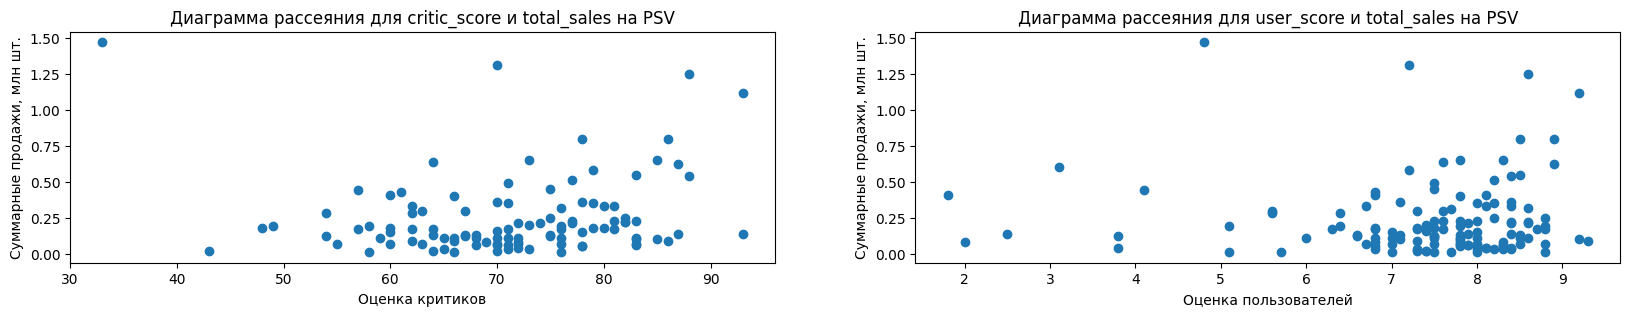

'Платформа PS3.'

,total_sales,critic_score,user_score
total_sales,1.00,0.33,-0.01
critic_score,0.33,1.00,0.54
user_score,-0.01,0.54,1.00


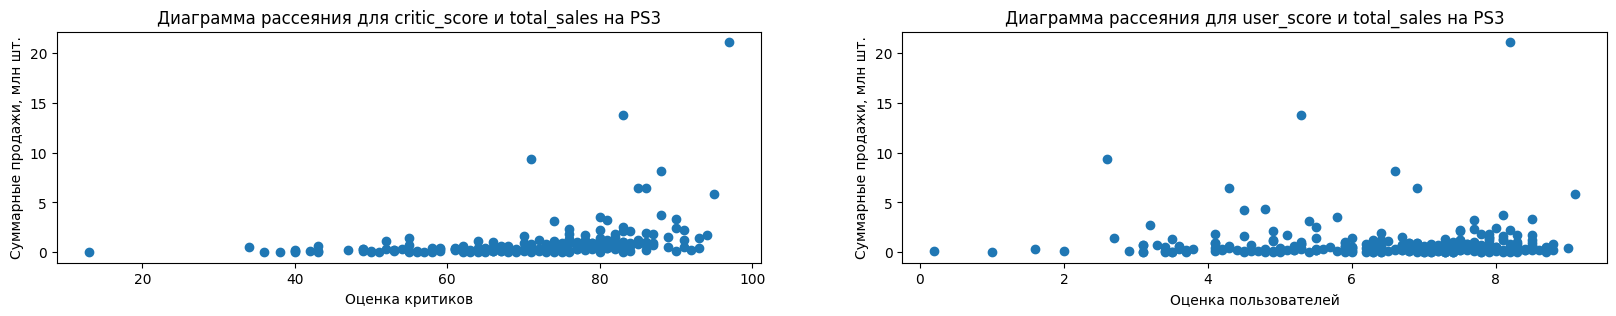

'Платформа X360.'

,total_sales,critic_score,user_score
total_sales,1.00,0.36,0.01
critic_score,0.36,1.00,0.56
user_score,0.01,0.56,1.00


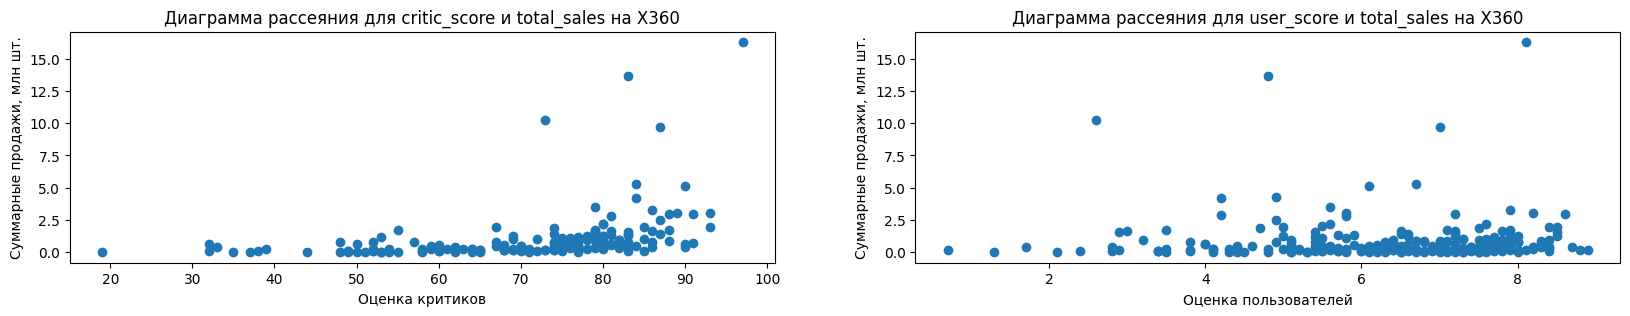

In [100]:
# Взглянем на диаграммы рассеяния и матрицу корреляций по актуальным платформам, по которым есть хотя бы сотня отзывов.
# Формируем топ
top_platforms = actual_df.query('year_of_release == 2016').groupby('platform')['total_sales'].sum().sort_values(ascending=False).index
for i, platform in enumerate(top_platforms):
    # Берем те платформы, у которых хотя бы 100 отзывов критиков и 100 отзывов пользователей
    critics_100_minus = actual_df[actual_df['platform'] == platform].dropna(subset=['critic_score', 'total_sales'])['critic_score'].shape[0] < 100
    users_100_minus = actual_df[actual_df['platform'] == platform].dropna(subset=['user_score', 'total_sales'])['user_score'].shape[0] < 100
    if critics_100_minus or users_100_minus:
        continue

    display(f'Платформа {platform}.')
    # Строим матрицу корреляции
    display(actual_df[actual_df['platform'] == platform][['total_sales', 'critic_score', 'user_score']].corr())

    # Рисуем диаграммы рассеяния
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 3))
    ax1.set_title(f'Диаграмма рассеяния для critic_score и total_sales на {platform}')
    ax1.set_xlabel('Оценка критиков')
    ax1.set_ylabel('Суммарные продажи, млн шт.')
    ax1.scatter(x=actual_df[actual_df['platform'] == platform].dropna(subset=['critic_score', 'total_sales'])['critic_score'], y=actual_df[actual_df['platform'] == platform].dropna(subset=['critic_score', 'total_sales'])['total_sales'])
    ax2.set_title(f'Диаграмма рассеяния для user_score и total_sales на {platform}')
    ax2.set_xlabel('Оценка пользователей')
    ax2.set_ylabel('Суммарные продажи, млн шт.')
    ax2.scatter(x=actual_df[actual_df['platform'] == platform].dropna(subset=['user_score', 'total_sales'])['user_score'], y=actual_df[actual_df['platform'] == platform].dropna(subset=['user_score', 'total_sales'])['total_sales'])
    plt.show()

Как видно из диаграмм рассеяния и матриц корреляций на всех актуальных платформах с достаточным количеством оценок - картина в целом не меняется, но есть исключения. В целом корреляция с оценкой критиков на уровне 24-42% (исключение - PSV, корреляция  на уровне 9%). Корреляция с оценкой пользователей околонулевая (исключение - 3DS, корреляция на уровне 20%). Вероятно, в сборе оценок по играм PSV и 3DS есть какие-то особенности, изучение которых оставим за пределами данной работы. Радикально на картину связи оценок и продаж эти исключения не влияют.

### Жанры

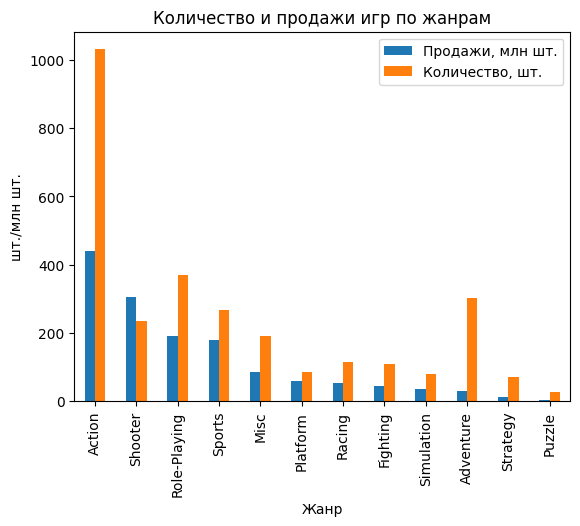

In [101]:
# Посмотрим на продажи и количество выпускаемых игр по жанрам
genres = actual_df.groupby('genre')['total_sales'].agg({'count', 'sum'}).sort_values('sum', ascending=False)
genres.columns = ['Продажи, млн шт.', 'Количество, шт.']
ax = genres.plot(kind='bar')
ax.set_title("Количество и продажи игр по жанрам")
ax.set_ylabel('шт./млн шт.')
ax.set_xlabel('Жанр')
plt.show()

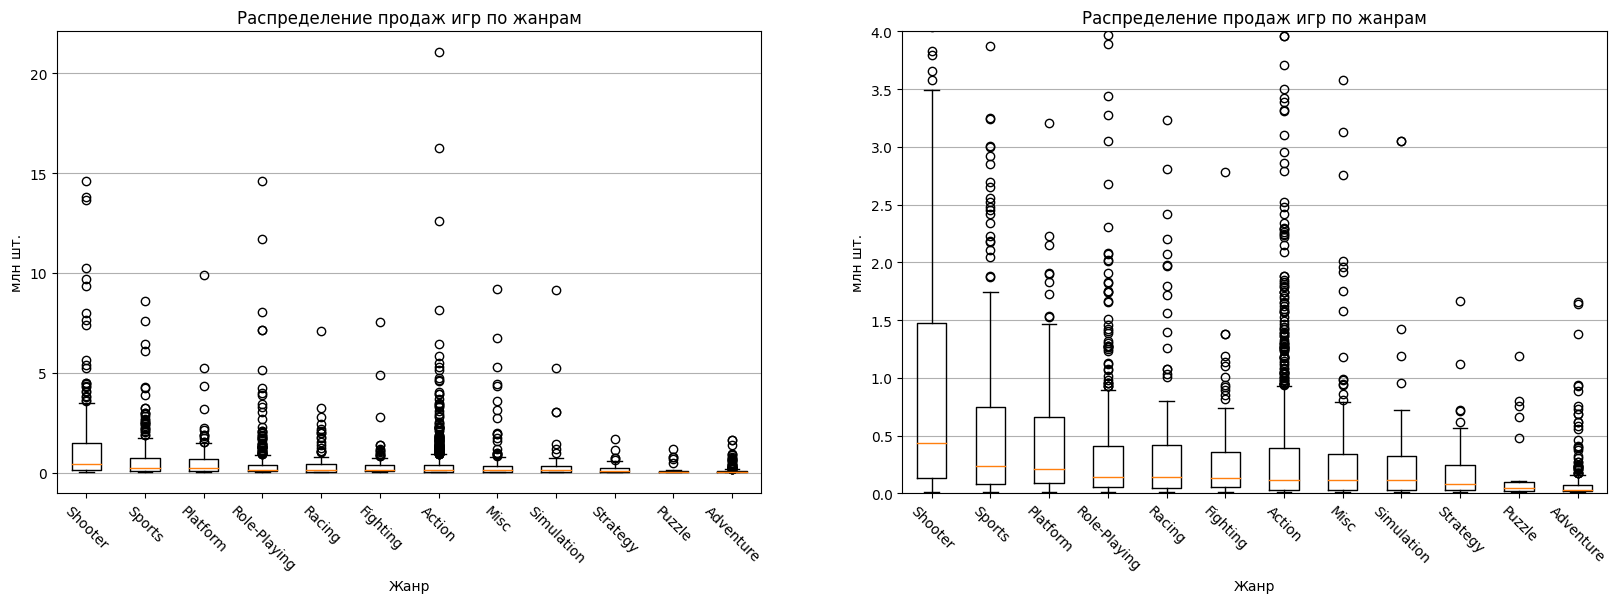

In [102]:
# Построим боксплоты по всем актуальным жанрам.
# Формируем данные для графика.
total_sales_by_genre = actual_df.groupby('genre')['total_sales'].median().sort_values(ascending=False)
genres = total_sales_by_genre.index
data_for_graph = []
for genre in genres:
    data_for_graph.append(actual_df.query('genre == @genre')['total_sales'])

#Рисуем график.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))
ax1.set_title('Распределение продаж игр по жанрам')
ax1.set_ylabel('млн шт.')
ax1.set_xlabel('Жанр')
ax1.yaxis.grid(True)
ax1.tick_params(axis='x', rotation=-45)
ax1.boxplot(data_for_graph, labels=genres)
ax2.set_title('Распределение продаж игр по жанрам')
ax2.set_ylabel('млн шт.')
ax2.set_xlabel('Жанр')
ax2.set_ylim(0, 4)
ax2.yaxis.grid(True)
ax2.tick_params(axis='x', rotation=-45)
ax2.boxplot(data_for_graph, labels=genres);

**Продажи:**
* Жанром с самым большим числом продаж является Action. Так же это жанр с наибольшим числом выпускающихся игр.
* Топ4 как по релизам так и по продажам составляют жанры:
    * Action
    * Shooter
    * Role-playing
    * Sports
* За ними следует категория "Прочие".
* Из аутсайдеров можно выделить нишевые паззлы, стратегии и адвенчуры, которые до сих пор продаются на консолях, но по которым уже почти не выпускают новых игр.

**Прибыльность:**
* Самые высокие медианные продажи у шутеров, спортивных игр и платформеров. Это говорит об устойчивом спросе на игры жанра, а значит - является косвенным подтверждением его прибыльности.
* Аутсайдерами по медианным продажам так же являются паззлы, стратегии и адвенчуры.

## Региональные особенности

### Популярность платформ

'Регион NA - Топ 5'

platform
X360   140.05
PS4    108.74
PS3    103.38
XOne    93.12
3DS     55.31
Name: na_sales, dtype: float64

'Регион EU - Топ 5'

platform
PS4    141.09
PS3    106.85
X360    74.52
XOne    51.59
3DS     42.64
Name: eu_sales, dtype: float64

'Регион JP - Топ 5'

platform
3DS    87.79
PS3    35.29
PSV    21.04
PS4    15.96
WiiU   13.01
Name: jp_sales, dtype: float64

Text(0.5, 1.0, 'Популярные платформы в регионе JP, %')

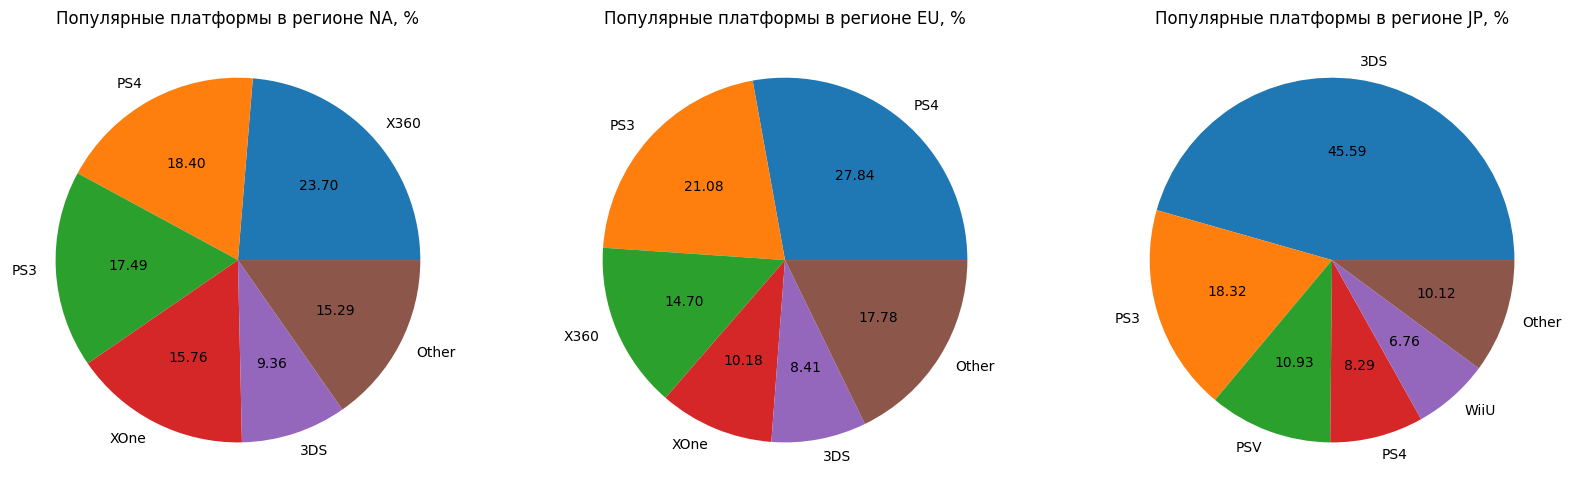

In [103]:
# Будем так же использовать актуальные данные
# Расчёт данных
na_platform_sales_other = actual_df.groupby('platform')['na_sales'].sum().sort_values(ascending=False).sum() - actual_df.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head().sum()
na_platform_sales = pd.concat([actual_df.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(), pd.Series(data=na_platform_sales_other, index=["Other"])])
eu_platform_sales_other = actual_df.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).sum() - actual_df.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head().sum()
eu_platform_sales = pd.concat([actual_df.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(), pd.Series(data=eu_platform_sales_other, index=["Other"])])
jp_platform_sales_other = actual_df.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).sum() - actual_df.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head().sum()
jp_platform_sales = pd.concat([actual_df.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(), pd.Series(data=jp_platform_sales_other, index=["Other"])])

# Выводим топы таблицами
display("Регион NA - Топ 5")
display(actual_df.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head())
display("Регион EU - Топ 5")
display(actual_df.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head())
display("Регион JP - Топ 5")
display(actual_df.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head())

# Рисуем графики
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))
ax1.pie(na_platform_sales, labels=na_platform_sales.index, autopct='%.2f')
ax1.set_ylabel(None)
ax1.set_title('Популярные платформы в регионе NA, %')
ax2.pie(eu_platform_sales, labels=eu_platform_sales.index, autopct='%.2f')
ax2.set_ylabel(None)
ax2.set_title('Популярные платформы в регионе EU, %')
ax3.pie(jp_platform_sales, labels=jp_platform_sales.index, autopct='%.2f')
ax3.set_ylabel(None)
ax3.set_title('Популярные платформы в регионе JP, %')

* Популярность платформ варьируется от региона к региону.
* В северной америке наиболее популярна платформа XBox. Не удивительно, ведь именно в США базируется компания-разработчик этой платформы. Консоль прошлого поколения X360 на первом месте, XOne еще на взлете и суммарные продажи по ним превышают суммарные продажи на консолях Sony (так же двух поколений PS3 и PS4).
* Влияние Sony в Европе сильнее. Топ здесь занимают два поколения PS (3 и 4), причем PS4 явно является суперхитом, а Xbox и Нинтендо сильно отстают.
* В Японии традиционно сильны позиции Nintendo, эта платформа лидер с большим отрывом. Про иксбокс тут не слышали, а Sony всё еще любят по историческим причинам.

### Популярность жанров

'Регион NA - Топ 5'

genre
Action         177.84
Shooter        144.77
Sports          81.53
Role-Playing    64.00
Misc            38.19
Name: na_sales, dtype: float64

'Регион EU - Топ 5'

genre
Action         159.34
Shooter        113.47
Sports          69.08
Role-Playing    48.53
Racing          27.29
Name: eu_sales, dtype: float64

'Регион JP - Топ 5'

genre
Role-Playing   65.44
Action         52.80
Misc           12.86
Simulation     10.41
Fighting        9.44
Name: jp_sales, dtype: float64

Text(0.5, 1.0, 'Популярные жанры в регионе JP, %')

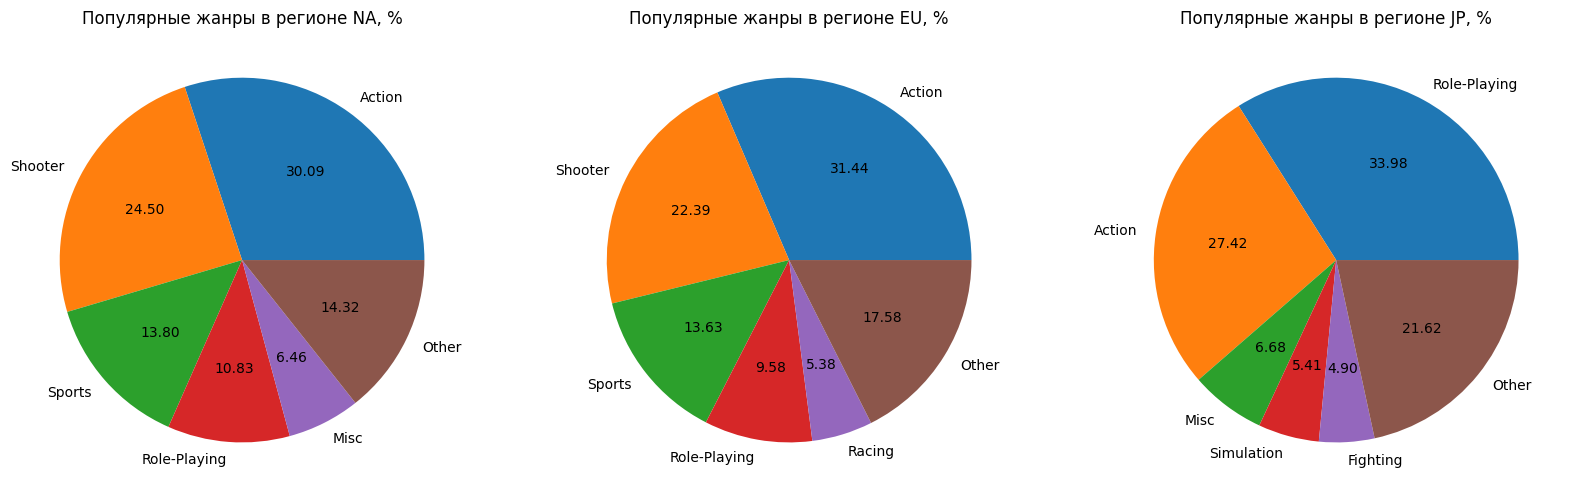

In [104]:
# Будем так же использовать актуальные данные
# Расчёт данных
na_genre_sales_other = actual_df.groupby('genre')['na_sales'].sum().sort_values(ascending=False).sum() - actual_df.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head().sum()
na_genre_sales = pd.concat([actual_df.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(), pd.Series(data=na_genre_sales_other, index=["Other"])])
eu_genre_sales_other = actual_df.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).sum() - actual_df.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head().sum()
eu_genre_sales = pd.concat([actual_df.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(), pd.Series(data=eu_genre_sales_other, index=["Other"])])
jp_genre_sales_other = actual_df.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).sum() - actual_df.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head().sum()
jp_genre_sales = pd.concat([actual_df.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(), pd.Series(data=jp_genre_sales_other, index=["Other"])])

# Выводим топы таблицами
display("Регион NA - Топ 5")
display(actual_df.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head())
display("Регион EU - Топ 5")
display(actual_df.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head())
display("Регион JP - Топ 5")
display(actual_df.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head())

# Рисуем графики
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))
ax1.pie(na_genre_sales, labels=na_genre_sales.index, autopct='%.2f')
ax1.set_ylabel(None)
ax1.set_title('Популярные жанры в регионе NA, %')
ax2.pie(eu_genre_sales, labels=eu_genre_sales.index, autopct='%.2f')
ax2.set_ylabel(None)
ax2.set_title('Популярные жанры в регионе EU, %')
ax3.pie(jp_genre_sales, labels=jp_genre_sales.index, autopct='%.2f')
ax3.set_ylabel(None)
ax3.set_title('Популярные жанры в регионе JP, %')

* Популярность жанров в регионах NA и EU практически не отличается. Это культурно близкие регионы, которые находятся практически в одном информационном поле.
* Можно лишь отметить слегка повышенный интерес к играм в жанре Racing в Европе.
* В Японии же картина радикально другая. Ролевые игры - на первом месте, так же очень популярны экшн-игры, но совсем непопулярны шутеры и игры про спорт.
* Почти 7 процентов продаж приходится на игры категории "Прочее", что сопоставимо с долями в других регионах.

### Рейтинг ESRB
**Справка:**
* E - для всех
* E10+ - от 10 лет и старше
* T - от 13 лет и старше
* M - для взрослых

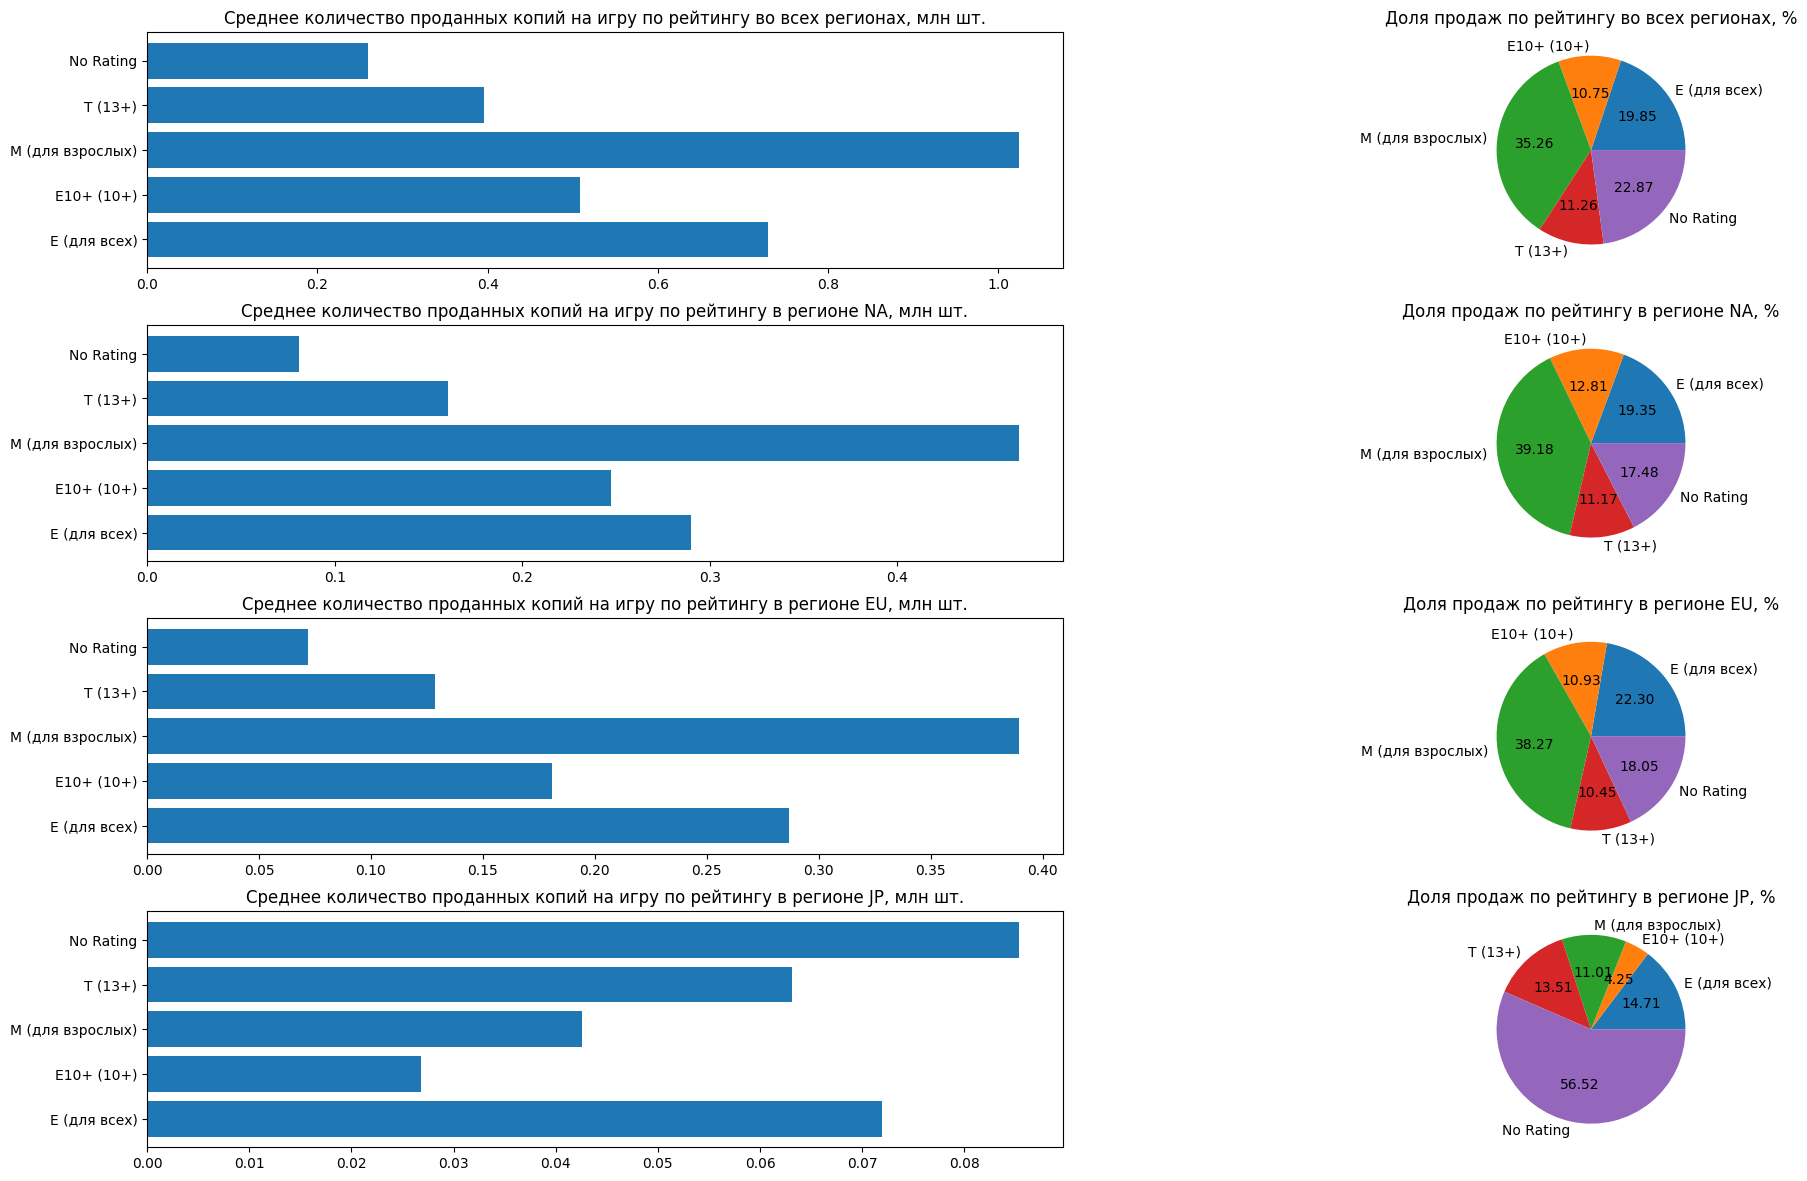

In [105]:
# Рассчитаем среднюю продажу на одну игру определенного рейтинга
ax1_data = actual_df.groupby('rating', dropna=False)['total_sales'].mean().sort_index().set_axis(['E (для всех)', 'E10+ (10+)', 'M (для взрослых)', 'T (13+)', 'No Rating'])
ax2_data = actual_df.groupby('rating', dropna=False)['na_sales'].mean().sort_index().set_axis(['E (для всех)', 'E10+ (10+)', 'M (для взрослых)', 'T (13+)', 'No Rating'])
ax3_data = actual_df.groupby('rating', dropna=False)['eu_sales'].mean().sort_index().set_axis(['E (для всех)', 'E10+ (10+)', 'M (для взрослых)', 'T (13+)', 'No Rating'])
ax4_data = actual_df.groupby('rating', dropna=False)['jp_sales'].mean().sort_index().set_axis(['E (для всех)', 'E10+ (10+)', 'M (для взрослых)', 'T (13+)', 'No Rating'])
ax5_data = actual_df.groupby('rating', dropna=False)['total_sales'].sum().sort_index().set_axis(['E (для всех)', 'E10+ (10+)', 'M (для взрослых)', 'T (13+)', 'No Rating'])
ax6_data = actual_df.groupby('rating', dropna=False)['na_sales'].sum().sort_index().set_axis(['E (для всех)', 'E10+ (10+)', 'M (для взрослых)', 'T (13+)', 'No Rating'])
ax7_data = actual_df.groupby('rating', dropna=False)['eu_sales'].sum().sort_index().set_axis(['E (для всех)', 'E10+ (10+)', 'M (для взрослых)', 'T (13+)', 'No Rating'])
ax8_data = actual_df.groupby('rating', dropna=False)['jp_sales'].sum().sort_index().set_axis(['E (для всех)', 'E10+ (10+)', 'M (для взрослых)', 'T (13+)', 'No Rating'])

fig, ax = plt.subplots(4, 2, figsize=(20,12))
fig.tight_layout(pad=2)

ax[0][0].barh(ax1_data.index, ax1_data)
ax[1][0].barh(ax2_data.index, ax2_data)
ax[2][0].barh(ax3_data.index, ax3_data)
ax[3][0].barh(ax4_data.index, ax4_data)
ax[0][1].pie(ax5_data, labels=ax5_data.index, autopct='%.2f')
ax[1][1].pie(ax6_data, labels=ax5_data.index, autopct='%.2f')
ax[2][1].pie(ax7_data, labels=ax5_data.index, autopct='%.2f')
ax[3][1].pie(ax8_data, labels=ax5_data.index, autopct='%.2f')

ax[0][0].set_title('Среднее количество проданных копий на игру по рейтингу во всех регионах, млн шт.')
ax[1][0].set_title('Среднее количество проданных копий на игру по рейтингу в регионе NA, млн шт.')
ax[2][0].set_title('Среднее количество проданных копий на игру по рейтингу в регионе EU, млн шт.')
ax[3][0].set_title('Среднее количество проданных копий на игру по рейтингу в регионе JP, млн шт.')
ax[0][1].set_title('Доля продаж по рейтингу во всех регионах, %')
ax[1][1].set_title('Доля продаж по рейтингу в регионе NA, %')
ax[2][1].set_title('Доля продаж по рейтингу в регионе EU, %')
ax[3][1].set_title('Доля продаж по рейтингу в регионе JP, %');

* Как видно из приведенных выше графиков Япония снова сильно отличается от регионов EU и NA.
* В регионах NA и EU влияние рейтинга на вероятность высоких продаж примерно одинакова. Лучше всего продаются игры с рейтингом для взрослых. Игры без рейтинга продаются хуже всего. В Европе игры для всех (или доступные для самых маленьких) имеют чуть больше шансов на продажу, чем в NA.
* В Японии в целом влияние рейтинга на продажи ниже. Почти 60% игр вообще его не имеют и при этом это лучшая категория по продажам. На втором месте - игры без ограничений, что не удивительно на родном рынке Nintendo. Также относительно рынков EU и NA местами поменялись игры от 10 лет и от 13. В Японии лучше покупают вторые.
* Таким образом можно заключить, что определенное влияние рейтинга на продажи есть и в регионах NA и EU оно больше, чем в JP (в Японии наличие возрастных ограничений скорее минус для продаж игры).

## Гипотезы

### Рейтинги на платформах Xbox One и PC
**Что необходимо проверить:** Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
В данном случае применяем проверку гипотезы равенства среднего по двум генеральным совокупностям, используем для этого двусторонний метод st.ttest_ind().
Первая совокупность - выборка по платформе XOne, вторая - выборка по платформе PC.
Значимость установим на уровне 0.01.

**Гипотезы:**
**Н0:** Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
**Н1:** Средние пользовательские рейтинги платформ Xbox One и PC различаются.


In [106]:
# Посмотрим на абсолютные значения средних по обеим совокупностям.
display("Средний пользовательский рейтинг на платформе XOne:")
display(actual_df.query('platform == "XOne"')["user_score"].dropna().mean())
display("Средний пользовательский рейтинг на платформе PC:")
display(actual_df.query('platform == "PC"')["user_score"].dropna().mean())

'Средний пользовательский рейтинг на платформе XOne:'

6.521428571428572

'Средний пользовательский рейтинг на платформе PC:'

6.4286407766990274

In [107]:
alpha = 0.01
result = st.ttest_ind(actual_df.query('platform == "XOne"')['user_score'].dropna(), actual_df.query('platform == "PC"')['user_score'].dropna(), alternative='two-sided')
display('Pvalue:' + str(result.pvalue))
if result.pvalue > alpha:
    display('Нет оснований отвергать нулевую гипотезу.')
else:
    display('Отвергаем нулевую гипотезу.')

'Pvalue:0.5535080500643661'

'Нет оснований отвергать нулевую гипотезу.'

**Вывод:**
* Разница в абсолютных значениях средних составляет всего 1 десятую балла.
* **Нет оснований предполагать, что средние пользовательские рейтинги платформ XOne и PC различаются.**
* При изменении уровня значимости до 0.05 вывод не поменяется.

### Рейтинги жанров Action и Sports
**Что необходимо проверить:** Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Тут так же вопрос о равенстве или неравенстве среднего по двум ген. совокупностям. Задача аналогичная, но сформулирована от обратного. Поэтому в данном случае так же применяем проверку гипотезы равенства среднего по двум генеральным совокупностям, используем для этого двусторонний метод st.ttest_ind().
Первая совокупность - выборка по жанру Action, вторая - выборка по жанру Sports.
Значимость установим на уровне 0.01.

**Гипотезы:**
**Н0:** Средние пользовательские рейтинги жанров Action и Sports одинаковые.
**Н1:** Средние пользовательские рейтинги жанров Action и Sports различаются.

In [108]:
# Посмотрим на абсолютные значения средних по обеим совокупностям.
display("Средний пользовательский рейтинг по жанру Action:")
display(actual_df.query('genre == "Action"')["user_score"].dropna().mean())
display("Средний пользовательский рейтинг по жанру Sports:")
display(actual_df.query('genre == "Sports"')["user_score"].dropna().mean())

'Средний пользовательский рейтинг по жанру Action:'

6.825047801147227

'Средний пользовательский рейтинг по жанру Sports:'

5.455670103092784

In [109]:
alpha = 0.01
result = st.ttest_ind(actual_df.query('genre == "Action"')['user_score'].dropna(), actual_df.query('genre == "Sports"')['user_score'].dropna(), alternative='two-sided')
display('Pvalue:' + str(result.pvalue))
if result.pvalue > alpha:
    display('Нет оснований отвергать нулевую гипотезу.')
else:
    display('Отвергаем нулевую гипотезу.')

'Pvalue:4.8045233804629176e-26'

'Отвергаем нулевую гипотезу.'

**Вывод:**
* Разница в абсолютных значениях пользовательских рейтингов между жанрами составляет существенные 1.4 балла.
* **Средние пользовательские рейтинги жанров Action и Sports различаются.**
* При изменении уровня значимости до 0.05 вывод не поменяется.

## Выводы по работе
* В работе проанализированы данные из открытых источников по продаже компьютерных игр за период с 1980 по 2016 гг. Данные за 2016 год представлены не полностью.
* В данных имеется ряд существенных неустранимых пропусков, преимущественно в части оценок пользователей и критиков, а так же пропуски по возрастному рейтингу. По части тайтлов не заполнены даты релизов, выявлены так же незначительные несоответствия в дате релиза и в обозначенной платформе (платформа не существовала в обозначенную дату релиза). Эти несоответствия были учтены при формировании выводов.
* Так же были удалены 2 неявных дубля в данных.
&nbsp;

Весь период наблюдения:
* Анализ общемировых продаж в количественных показателях показывает не совсем ожидаемую динамику. **Необходимо более подробно разобраться в причинах резкого спада продаж после 2009 года и подтвердить, что влияние финансового кризиса действительно оказалось настолько существенным для игровой индустрии.**
* За весь период наблюдения самыми популярными платформами оказались: PS2, X360, PS3, WiiU, DS. Характерный срок жизни платформы составил 8-9 лет.
* На основе графика продаж определен период, который можно условно определить как "актуальный": период с 2012 года включительно. Это период после резких изменений в объемах продаж, период в течении которого динамика изменений относительно спокойна. Все дальнейшие выводы строятся на основе данных за "актуальный период".
&nbsp;

Актуальный период:
* Актуальными платформами-лидерами к 2016 году являются платформы PS4, XOne, 3DS.
* Продажи игр в целом распределены очень неравномерно (основная масса игр имеет средне-низкие продажи, единицы превосходят по продажам все остальные на порядки). Актуальными играми-лидерами являются игры серии CoD, GTA5, FIFA, Halo, а так же ряд эксклюзивов Nintendo.
* Изучено влияние оценок на продажи игр. За редким исключением оценки пользователей не связаны с продажами, а оценки критиков при этом имеют умеренное влияние на продажи.
* Выявлены наиболее популярные жанры видеоигр: Action, Shooter, Role-playing, Sports. Так же выявлены умирающие жанры, среди них: паззлы, стратегии и адвенчуры.
* Самые высокие медианные продажи показывают игры жанров шутер, спорт, платформер, что является косвенным свидетельством прибыльности этих жанров. Аутсайдеры по медианным продажам - те же паззлы, стратегии, адвенчуры.

Проанализированы региональные особенности:
* Различия имеются по популярности платформ, жанров и по влиянию возрастного рейтинга на продажи.
* В NA лидирует Xbox, в EU - PS, в JP - Нинтендо.
* В NA и EU наиболее популярны жанры Action и Shooter, в JP - Role-Playing и Action.
* В NA и EU возрастной рейтинг участвует в формировании продаж. Здесь наибольшие продажи у игр для взрослых. В JP наличие рейтинга скорее снижает продажи, но если рейтинг выдан - лучшие продажи показывают игры в категории "для всех".

В завершающей части работы проверены две гипотезы. Выводы:
1. Нет оснований предполагать, что средние пользовательские рейтинги платформ XOne и PC различаются.
2. Средние пользовательские рейтинги жанров Action и Sports различаются.

Итоговые рекомендации по проведению маркетинговой компании на 2017 год:
* Сосредоточить маркетинговые усилия на наиболее массовых и актуальных платформах: регионах NA, EU - PS4 и XOne; в регионе JP - 3DS.
* Из жанров предпочтения отдавать: в регионах NA и EU - шутерам (наиболее прибыльный жанр) и экшн-ирам(наиболее популярный жанр), в JP - ролевым и экшн играм (наиболее популярные жанры).
* В регионах EU и NA - ориентироваться на возрастной рейтинг ESRB M(для взрослых). В JP - ориентироваться на игры категории для всех и игры без возрастного рейтинга ESRB.
* Приоритет так же стоит отдавать играм с высокой оценкой от критиков.